In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']= 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [124]:
df = pd.read_csv('a.csv')

In [5]:
df

,label,eng,kor,math
0,aa,30,70,100
1,bb,60,30,50
2,cc,80,70,90
3,dd,90,60,65
4,ee,70,20,80


In [6]:
df = pd.read_csv('a.csv', index_col='label')

In [7]:
df

,eng,kor,math
label,,,
aa,30,70,100
bb,60,30,50
cc,80,70,90
dd,90,60,65
ee,70,20,80


In [8]:
birthDF = pd.read_csv('data/births.txt', header=None, index_col=0)
birthDF.columns = ['남아수', '여아수']
birthDF.index.name='년도'

In [9]:
birthDF

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [10]:
def fn(v):
    print('v = ', v)
    print("=============")
    return v.sum()

In [11]:
df.apply(fn, axis=1)

v =  eng      30
kor      70
math    100
Name: aa, dtype: int64
v =  eng     60
kor     30
math    50
Name: bb, dtype: int64
v =  eng     80
kor     70
math    90
Name: cc, dtype: int64
v =  eng     90
kor     60
math    65
Name: dd, dtype: int64
v =  eng     70
kor     20
math    80
Name: ee, dtype: int64


label
aa    200
bb    140
cc    240
dd    215
ee    170
dtype: int64

In [ ]:
# 1.남아수 총합
# 2.여아수 평균
# 3.남아수 가장 많은 연도 , 남아수
# 4.2000년 이후 데이터 구하시오|
# 5.1995~ 2000년도 데이터 구하시오

In [32]:
birthDF

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [38]:
# 1.남아수 총합

birthDF['남아수'].sum()

161802441

In [39]:
# 2.여아수 평균
birthDF['여아수'].mean()

1245399.2121212122

In [74]:
# 3.남아수 가장 많은 연도 , 남아수
num_boy = birthDF['남아수'].max()


# print(birthDF[birthDF['남아수']==num_boy].index[0],num_boy)


birthDF[birthDF['남아수']==num_boy][['남아수']]



,남아수
년도,
1957,2044160


In [75]:
# 4.2000년 이후 데이터 구하시오|
# birthDF[birthDF.index>2000]

birthDF.loc[2000:]

,남아수,여아수
년도,,
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289


In [76]:
# 5.1995~ 2000년도 데이터 구하시오
birthDF[(birthDF.index>=1995) & (birthDF.index<=2000)]

birthDF.loc[1995:2000]

,남아수,여아수
년도,,
1995,1757927,1902832
1996,1752249,1893378
1997,1739806,1884122
1998,1765915,1910250
1999,1772632,1918809
2000,1814601,1962406


In [83]:
df.nlargest(3, 'kor')

,eng,kor,math
label,,,
aa,30,70,100
cc,80,70,90
dd,90,60,65


In [86]:
df['eng'].nlargest(3)

label
dd    90
cc    80
ee    70
Name: eng, dtype: int64

In [87]:
df['kor'].nlargest(2)

label
aa    70
cc    70
Name: kor, dtype: int64

In [88]:
df.loc['bb', 'eng']=70

In [89]:
df

,eng,kor,math
label,,,
aa,30,70,100
bb,70,30,50
cc,80,70,90
dd,90,60,65
ee,70,20,80


In [90]:
df['eng']

label
aa    30
bb    70
cc    80
dd    90
ee    70
Name: eng, dtype: int64

In [95]:
df['eng'].nlargest(3, keep='all')

label
dd    90
cc    80
bb    70
ee    70
Name: eng, dtype: int64

6. 남아출생이 가장많은 top5 를 구하시오 (연도와 남아수)
7. 남아율(%)컬럼을 추가하고 각년도별 남아수가 차지하는 비율을 데이터로 보여주시오
8. 2000년도 이후 데이터에 대해 출생량 컬럼을 추가하고 남아수가 1800000 이상이면 많음 아니면 적음 이라고 보여주시오
9. 1800년대, 1900년대, 2000년대 각 남아, 여아 수 평균을 구하시오

In [14]:
# 6. 남아출생이 가장많은 top5 를 구하시오 (연도와 남아수)
birthDF['남아수'].nlargest(5)

년도
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: 남아수, dtype: int64

In [18]:
# 7. 남아율(%)컬럼을 추가하고 각년도별 남아수가 차지하는 비율을 데이터로 보여주시오
birthDF['남아율'] = (birthDF['남아수']/(birthDF['남아수']+birthDF['여아수']))*100
birthDF

,남아수,여아수,남아율
년도,,,
1880,90993,110491,45.161402
1881,91954,100745,47.718981
1882,107850,113688,48.682393
1883,112321,104629,51.772759
1884,129022,114445,52.993630
...,...,...,...
2007,1919408,2072139,48.086819
2008,1887234,2036289,48.100495
2009,1832925,1979303,48.080152


In [102]:
# 8. 2000년도 이후 데이터에 대해 출생량 컬럼을 추가하고 남아수가 1800000 이상이면 많음 아니면 적음 이라고 보여주시오
# # birthDF.index
# for i in range(120,132):
#     if birthDF[i]['남아수']>=1800000:
#         birthDF[i]['출생량'] = '많음'
#     else:
#         birthDF[i]['출생량'] = '적음'
b2000 = birthDF.loc[2000:]
b2000
b2000['출생량'] =  b2000['남아수'].apply(lambda v: '많음' if v>=1800000 else '적음')
b2000

C:\Users\82102\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,남아수,여아수,남아율,출생량
년도,,,,
2000,1814601,1962406,48.043358,많음
2001,1799049,1941251,48.099056,적음
2002,1795206,1939815,48.064147,적음
2003,1825359,1973434,48.051026,많음
2004,1834145,1982794,48.052772,많음
2005,1845379,1994841,48.053992,많음
2006,1898463,2052377,48.052136,많음
2007,1919408,2072139,48.086819,많음
2008,1887234,2036289,48.100495,많음


In [105]:
# 9. 1800년대, 1900년대, 2000년대 각 남아, 여아 수 평균을 구하시오

eighty_boy = birthDF.loc[1800:1899]['남아수'].mean()
eighty_girl = birthDF.loc[1800:1899]['여아수'].mean()

ninety_boy = birthDF.loc[1900:1999]['남아수'].mean()
ninety_girl = birthDF.loc[1900:1999]['여아수'].mean()

twenty_boy = birthDF.loc[2000:]['남아수'].mean()
twenty_girl = birthDF.loc[2000:]['여아수'].mean()

print("1800년대 평균 남 : {} 명 여 : {} 명\n1900년대 평균 남 : {} 명 여 : {} 명\n2000년대 평균 남 : {} 명 여 : {} 명".format(eighty_boy,eighty_girl,ninety_boy,ninety_girl,twenty_boy,twenty_girl))


1800년대 평균 남 : 176714.15 명 여 : 111820.55 명
1900년대 평균 남 : 1362901.51 명 여 : 1384145.55 명
2000년대 평균 남 : 1831500.5833333333 명 여 : 1978477.5 명


In [108]:
b1800 = birthDF.loc[1800:1899][ ['남아수','여아수'] ]
b1900 = birthDF.loc[1900:1999][ ['남아수','여아수'] ]
b2000 = birthDF.loc[2000:][ ['남아수','여아수'] ]

In [109]:
b1800.mean()

남아수    176714.15
여아수    111820.55
dtype: float64

In [110]:
b1900.mean()

남아수    1362901.51
여아수    1384145.55
dtype: float64

In [111]:
b2000.mean().round(2)

남아수    1831500.58
여아수    1978477.50
dtype: float64

In [112]:
mydf = pd.DataFrame( [b1800.mean(),b1900.mean(),b2000.mean().round(2)])
mydf.index = ['1800년대평균','1900년대평균','2000년대평균']
mydf

,남아수,여아수
1800년대평균,176714.15,111820.55
1900년대평균,1362901.51,1384145.55
2000년대평균,1831500.58,1978477.50


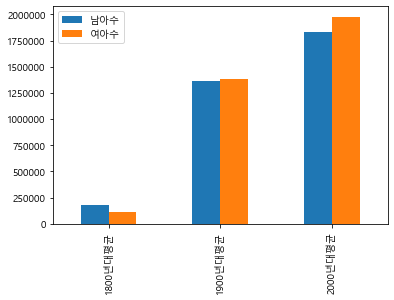

In [115]:
mydf.plot(kind='bar')
plt.show()

1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 
출력하시요.
2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요.
3. 절도검거율 컬럼을 추가 하시요.
4. 살인발생, 강도발생 2개컬럼 평균값이
15건 이상이면 '범죄매우높음' 10건이상이면
'범죄높음' 미만이면 '보통' 표시되는 '강력범죄정도'
컬럼을 추가하시요
5. 관서명 마지막글자 '서'를 제외한 글자로 구성된
 '지역'컬럼을 추가하시요
예) 마포,영등포, 성동..., 수서
6. 강도발생 탑5 관서명,강도발생, 강도검거를 출력하시요.
7. 살인발생과, 강도발생, 절도발생의 상관관계를 구하고
heat map으로 표시하시요.



In [11]:
crimeDF = pd.read_csv('crime_in_Seoul.csv', encoding='euc-kr', thousands = ',')

In [12]:
crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


In [246]:
# 1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요. 
    
crimeDF[crimeDF['살인 발생'] == crimeDF['살인 발생'].max()][['관서명', '살인 발생','살인 검거']]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


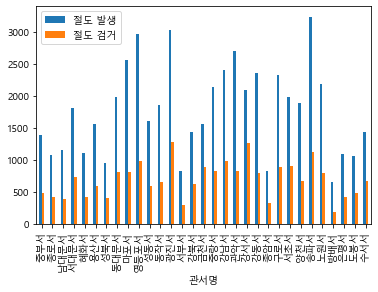

In [280]:
# 2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요.
# crimeDF['관서명'].values
crimeDF.index=crimeDF['관서명']
crimeDF.plot(kind='bar', y=['절도 발생', '절도 검거'])

In [210]:
# 3. 절도검거율 컬럼을 추가 하시요.
crimeDF['절도 검거율'] = 0.0
for i in range(len(crimeDF)):
    crimeDF['절도 검거율'][i] = int(crimeDF['절도 검거'][i])/int(crimeDF['절도 발생'][i])*100

C:\Users\82102\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [211]:
crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,34.193548
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,38.598131
2,남대문서,1,0,6,4,65,46,1153,382,869,794,33.130963
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,40.728477
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,38.061041
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,37.700706
6,성북서,2,2,2,1,86,71,953,409,1194,1015,42.917104
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.090358
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,31.819961
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,32.995951


In [13]:
# 4. 살인발생, 강도발생 2개컬럼 평균값이
# 15건 이상이면 '범죄매우높음' 10건이상이면
# '범죄높음' 미만이면 '보통' 표시되는 '강력범죄정도'
# 컬럼을 추가하시요
# crimeDF['강력범죄정도'] = np.nan
# for i in range(len(crimeDF)):
#     if (crimeDF['살인 발생'][i] + crimeDF['강도 발생'][i]) >= 30:
#         crimeDF['강력범죄정도'][i] = '범죄매우높음'
#     elif (crimeDF['살인 발생'][i] + crimeDF['강도 발생'][i]) >= 20:
#         crimeDF['강력범죄정도'][i] = '범죄높음'
#     else:
#         crimeDF['강력범죄정도'][i] = '보통'


def fn(v):
    if v.mean() > 15:
        return '범죄매우높음'
    elif v.mean() > 10:
        return '범죄높음'
    else:
        return '보통'
crimeDF['강력범죄정도'] = crimeDF[['살인 발생', '강도 발생']].apply(fn, axis=1)

In [218]:
crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율,강력범죄정도
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,34.193548,보통
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,38.598131,보통
2,남대문서,1,0,6,4,65,46,1153,382,869,794,33.130963,보통
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,40.728477,보통
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,38.061041,보통
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,37.700706,보통
6,성북서,2,2,2,1,86,71,953,409,1194,1015,42.917104,보통
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.090358,보통
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,31.819961,범죄높음
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,32.995951,범죄높음


In [15]:
# 5.관서명 마지막글자 '서'를 제외한 글자로 구성된 '지역'컬럼을 추가하시요 예) 마포,영등포, 성동..., 수서
crimeDF['지역'] = np.nan
crimeDF['관서명']
for i in range(len(crimeDF)):
    crimeDF['지역'][i] = crimeDF['관서명'][i][0:-1]
    
    
# crimeDF['지역'] = crimeDF.index.str[:-1]

C:\Users\82102\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\82102\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
crimeDF

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,강력범죄정도,지역
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,보통,중부
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,보통,종로
2,남대문서,1,0,6,4,65,46,1153,382,869,794,보통,남대문
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,보통,서대문
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,보통,혜화
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,보통,용산
6,성북서,2,2,2,1,86,71,953,409,1194,1015,보통,성북
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,보통,동대문
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,범죄높음,마포
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,범죄매우높음,영등포


In [237]:
# 6. 강도발생 탑5 관서명,강도발생, 강도검거를 출력하시요.
crimeDF.nlargest(5, '강도 발생')[['관서명', '강도 발생', '강도 검거']]

,관서명,강도 발생,강도 검거
9,영등포서,22,20
17,강남서,15,12
22,구로서,15,11
5,용산서,14,14
8,마포서,14,10


In [252]:
# 7. 살인발생과, 강도발생, 절도발생의 상관관계를 구하고 heat map으로 표시하시요.
crimeDF[['살인 발생', '강도 발생', '절도 발생']].corr()

,살인 발생,강도 발생,절도 발생
살인 발생,1.000000,0.640281,0.662590
강도 발생,0.640281,1.000000,0.744599
절도 발생,0.662590,0.744599,1.000000


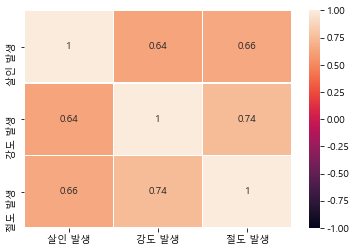

In [253]:
sb.heatmap(crimeDF[['살인 발생', '강도 발생', '절도 발생']].corr(), vmin=-1, vmax=1, annot=True, linewidth=0.5)